In [1]:
from CRISP import *
import matplotlib.pyplot as plt
import itertools

In [2]:
class Simulator:
    def __init__(self, pid):
        self.pid = pid
        
    def simulate_sales_at_blocks(self, sales_blocks):
        """simluate sales occurring in given blocks"""
        ems = []
        price = []
        # every block until the final sales block, plus 20% for padding
        block_list = list(range(math.ceil(1.2 * sales_blocks[-1])))
        
        last_sale = 0
        
        for block in block_list: 
            block_delta = block - last_sale;
            if block in sales_blocks:
                self.pid.purchase_sheet(block_delta)
                last_sale = block
                block_delta = 0
            ems.append(self.pid.get_ems(block_delta))
            price.append(self.pid.get_quote(block_delta))
            
        return (block_list, ems, price)
        
    def _plot_sim(self, block_list, ems, price, sales_blocks):
        
        fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))
        
        ems_line, = ax1.plot(block_list, ems)
        target_ems_line = ax1.axhline(y=self.pid.target_ems, color='r')
        
        ax1.set_xlabel("Block Number")
        ax1.set_ylabel("EMS")
        
        sale_line=0

        # for sale in sales_blocks[1:-1]:
        for sale in sales_blocks:
            sale_line = ax1.axvline(x=sale, color='g', linestyle=':')
            
        ax1.legend([target_ems_line, sale_line, ems_line], ['target_EMS', 'sale', 'current_EMS'], loc='upper right')
        
        price_line, = ax2.plot(block_list, price)
        ax2.set_xlabel("Block Number")
        ax2.set_ylabel("Price")
        # for sale in sales_blocks[1:-1]:
        for sale in sales_blocks:
            sale_line = ax2.axvline(x=sale, color='g', linestyle=':')
        
        ax2.legend([sale_line, price_line], ['sale', 'current_price'], loc='upper right')
        plt.suptitle("CRISP EMS and Price over time (sale averaging halflife: {}, price increase speed: {}, price decay halflife: {}, target blocks per sale: {})"
                    .format(self.pid.sale_halflife, self.pid.price_speed, self.pid.price_halflife, self.pid.target_blocks_per_sale))
        fig.tight_layout()
        plt.show()
        
    def plot_simulation(self, sales_blocks):
        """plot simulation in which CRISP sales occur in given blocks"""
        self.pid.reset_state()
        (blocks, ems, price) = self.simulate_sales_at_blocks(sales_blocks)
        self._plot_sim(blocks, ems, price, sales_blocks)

In [3]:
crisp = CRISP(sale_halflife=700, target_blocks_per_sale=100, price_speed=1, price_halflife=100)
sim = Simulator(crisp)

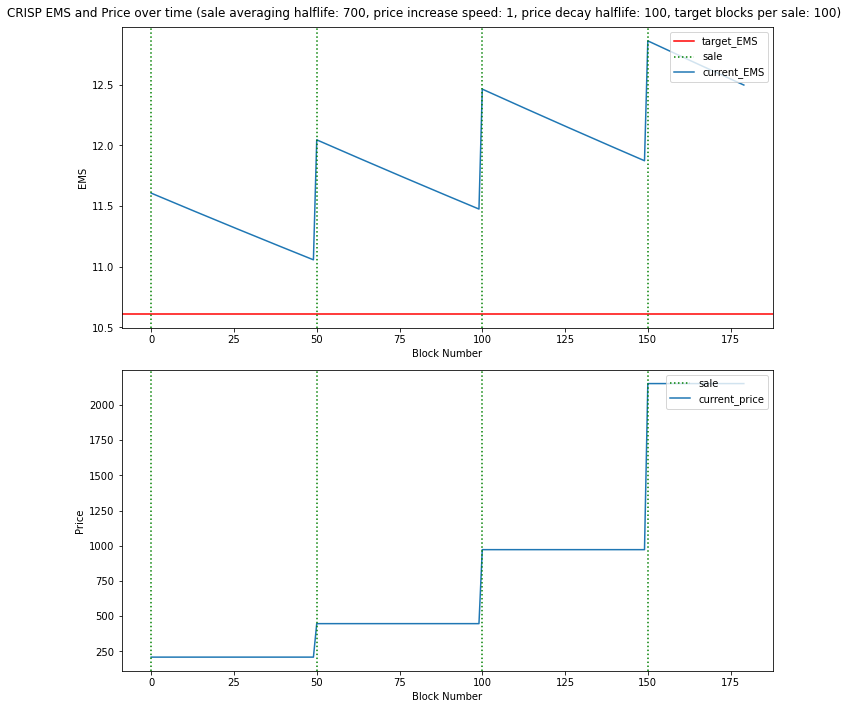

In [4]:
##price increases with every purchase when rate is above target
sim.plot_simulation([50 * x for x in range(4)])

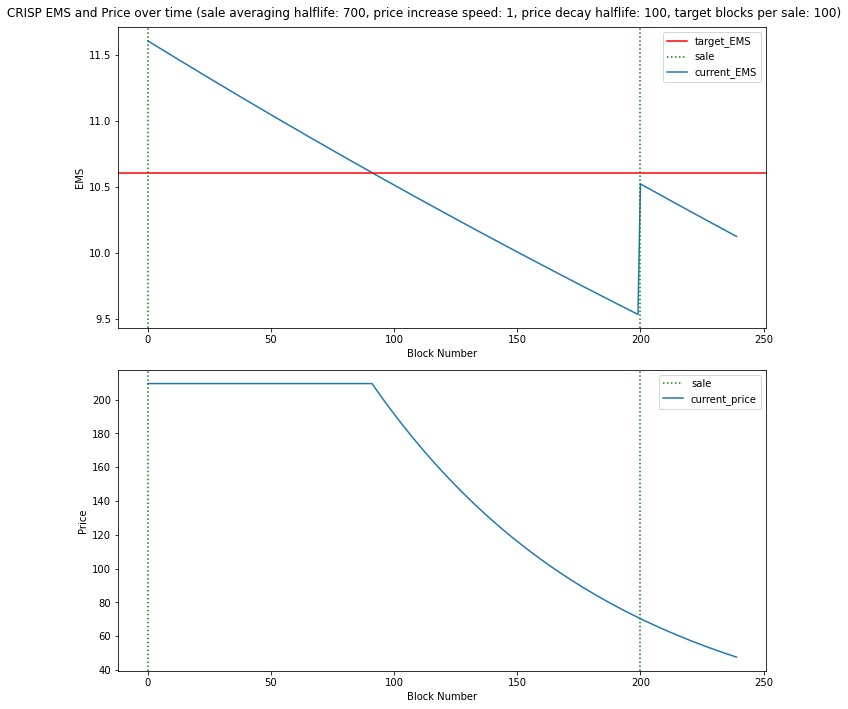

In [5]:
##purchase below target rate does not increase price
sim.plot_simulation([0, 200])

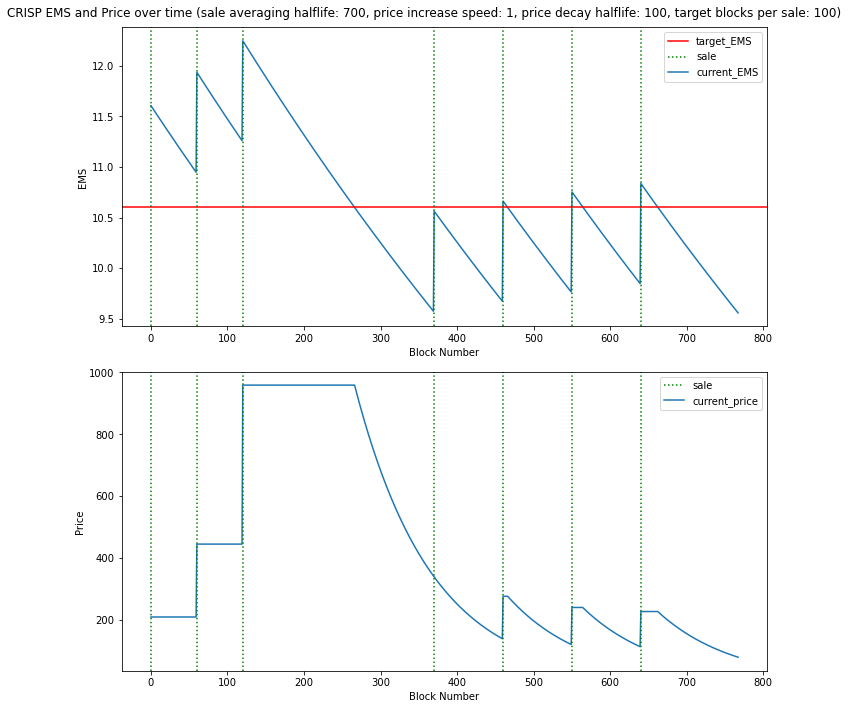

In [6]:
##A longer example
sim.plot_simulation([0,60, 120, 370, 460, 550, 640])